In [1]:
import python_inventory as pyinv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/starsCYG.csv", index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [4]:
log_Te = df['log.Te'].values
log_light = df['log.light'].values

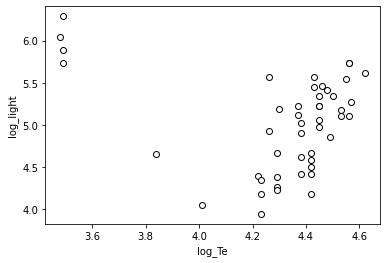

In [5]:
plt.scatter(log_Te, log_light, c='w', edgecolors='k')
plt.xlabel('log_Te')
plt.ylabel('log_light')
plt.show()

In [6]:
X = np.c_[log_Te, log_light]
Y = np.zeros(len(log_Te), 'd')

In [7]:
loss_func = pyinv.ErrorLoss(pyinv.Square())

In [8]:
line10 = pyinv.TLinearModel(1)
line10.init_param()

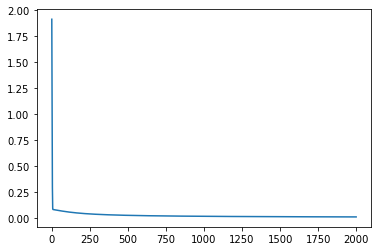

In [9]:
risk1 = pyinv.Risk(line10, loss_func)
gd1 = pyinv.GradientDescent(risk1, n_iter=2000)
gd1.fit(X, Y)

line1 = pyinv.LinearModel(1, line10.param)

plt.plot(gd1.rvals)
plt.show()

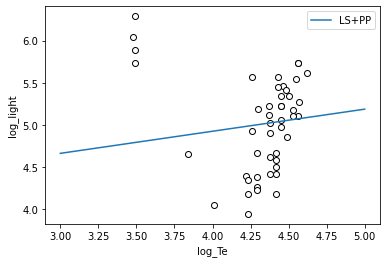

In [10]:
plt.scatter(log_Te, log_light, c='w', edgecolors='k')
XX = np.array([[3.0],[5.0]])
plt.plot([3.0, 5.0], line1.evaluate_all(XX), label='LS+PP')
plt.xlabel('log_Te')
plt.ylabel('log_light')
plt.legend()
plt.show()

In [44]:
line20 = pyinv.TLinearModel(1)
line20.init_param()

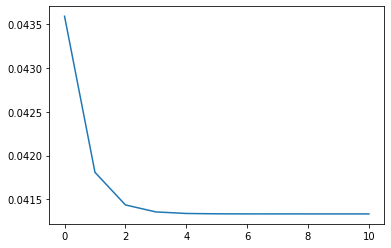

In [51]:
agg = pyinv.WMMean(pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.84))
risk2 = pyinv.Risk(line20, loss_func, agg=agg)
gd2 = pyinv.GradientDescent(risk2, n_iter=2000)
gd2.fit(X,Y)

line2 = pyinv.LinearModel(1, line20.param)

plt.plot(gd2.rvals)
plt.show()

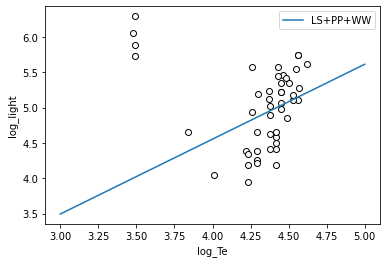

In [52]:
plt.scatter(log_Te, log_light, c='w', edgecolors='k')
XX = np.array([[3.0],[5.0]])
plt.plot([3.0, 5.0], line2.evaluate_all(XX), label='LS+PP+WW')
plt.xlabel('log_Te')
plt.ylabel('log_light')
plt.legend()
plt.show()

In [21]:
X1 = log_Te
X1s = X1.reshape(-1,1)
Y1 = log_light

In [22]:
line3 = pyinv.LinearModel(1)
line3.init_param()

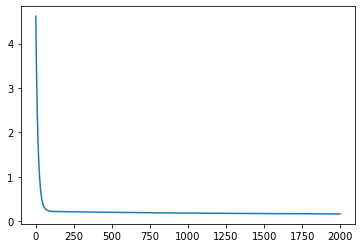

In [23]:
risk3 = pyinv.Risk(line3, loss_func)
gd3 = pyinv.GradientDescent(risk3, n_iter=2000)
gd3.fit(X1s,Y1)

plt.plot(gd3.rvals)
plt.show()

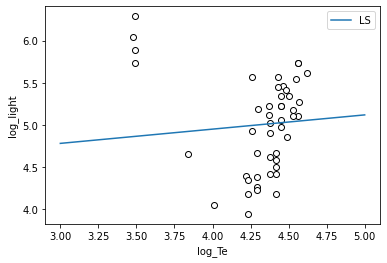

In [53]:
plt.scatter(log_Te, log_light, c='w', edgecolors='k')
XX = np.array([[3.0],[5.0]])
plt.plot([3.0, 5.0], line3.evaluate_all(XX), label='LS')
plt.xlabel('log_Te')
plt.ylabel('log_light')
plt.legend()
plt.show()

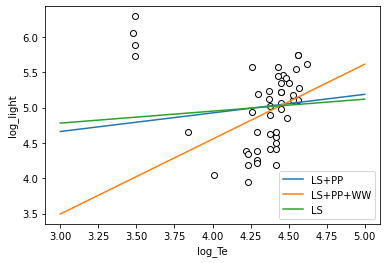

In [54]:
plt.scatter(log_Te, log_light, c='w', edgecolors='k')
XX = np.array([[3.0],[5.0]])
plt.plot([3.0, 5.0], line1.evaluate_all(XX), label='LS+PP')
plt.plot([3.0, 5.0], line2.evaluate_all(XX), label='LS+PP+WW')
plt.plot([3.0, 5.0], line3.evaluate_all(XX), label='LS')
plt.xlabel('log_Te')
plt.ylabel('log_light')
plt.legend()
plt.show()